In [212]:
import cv2
import numpy as np
import torch, torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as T

from pylab import rcParams

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

import os
import shutil
from glob import glob
from pathlib import Path

%matplotlib inline
rcParams['figure.figsize'] = 12, 8

In [213]:
train_folders = sorted(glob('./original_data/Train/*'))
print(len(train_folders))
print(train_folders)

43
['./original_data/Train\\0', './original_data/Train\\1', './original_data/Train\\10', './original_data/Train\\11', './original_data/Train\\12', './original_data/Train\\13', './original_data/Train\\14', './original_data/Train\\15', './original_data/Train\\16', './original_data/Train\\17', './original_data/Train\\18', './original_data/Train\\19', './original_data/Train\\2', './original_data/Train\\20', './original_data/Train\\21', './original_data/Train\\22', './original_data/Train\\23', './original_data/Train\\24', './original_data/Train\\25', './original_data/Train\\26', './original_data/Train\\27', './original_data/Train\\28', './original_data/Train\\29', './original_data/Train\\3', './original_data/Train\\30', './original_data/Train\\31', './original_data/Train\\32', './original_data/Train\\33', './original_data/Train\\34', './original_data/Train\\35', './original_data/Train\\36', './original_data/Train\\37', './original_data/Train\\38', './original_data/Train\\39', './original_da

### Exploration

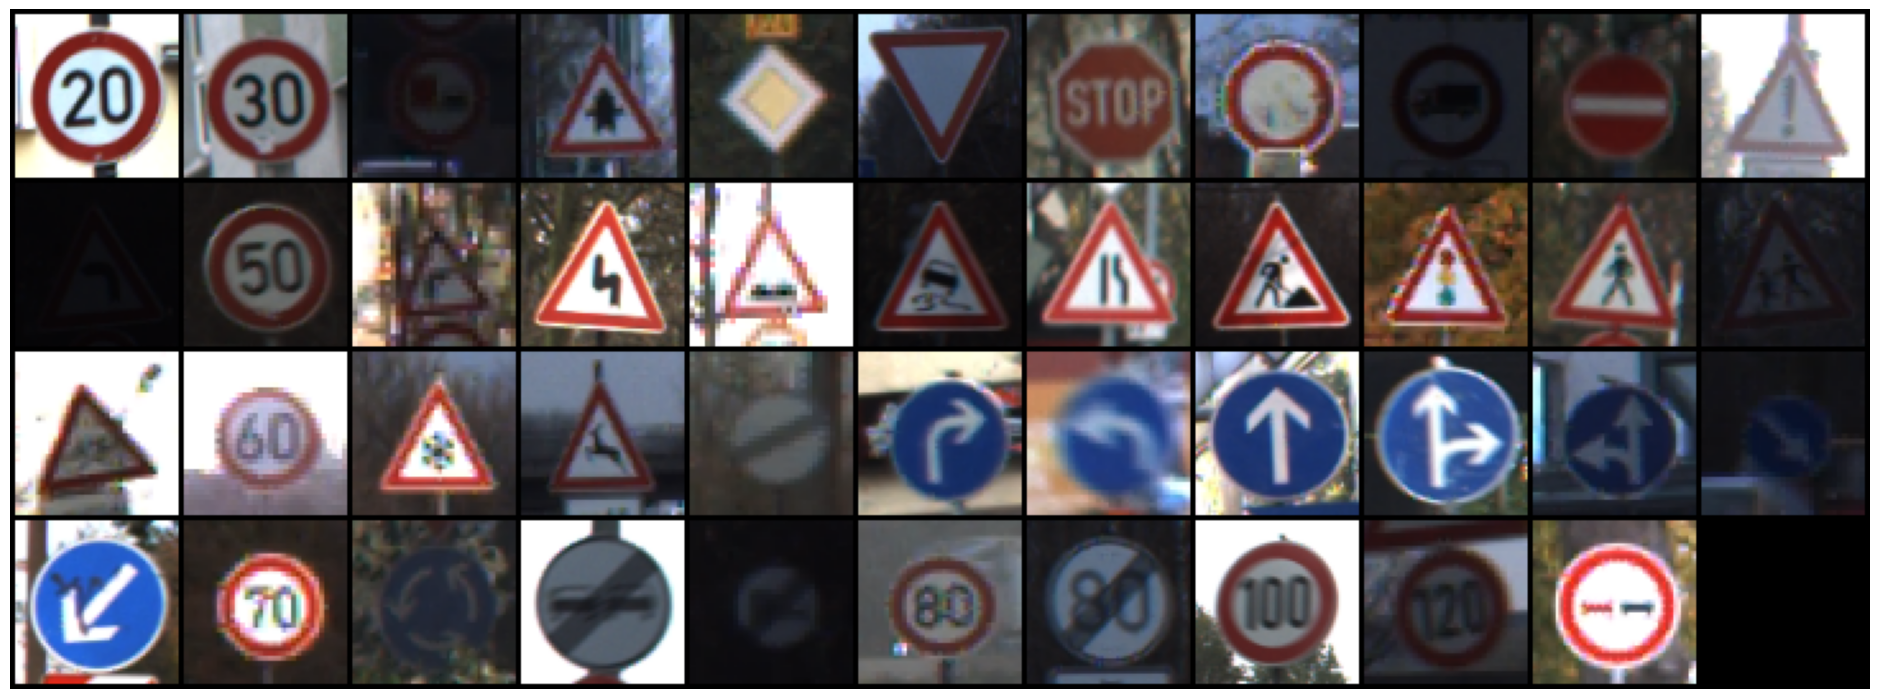

In [214]:
def load_image(img_path, resize=True):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    if resize:
        img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)
    return img

def show_sign_grid(image_paths):
    images = []
    for img in image_paths:
        images.append(load_image(img))
    images = torch.as_tensor(images)
    images = images.permute(0, 3, 1, 2)
    grid_img = torchvision.utils.make_grid(images, nrow=11)
    plt.figure(figsize=(24, 12))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis('off');

sample_image_paths = []
for tf in train_folders:
    sample_image_paths.append(np.random.choice(glob(f'{tf}/*.png')))

show_sign_grid(sample_image_paths)


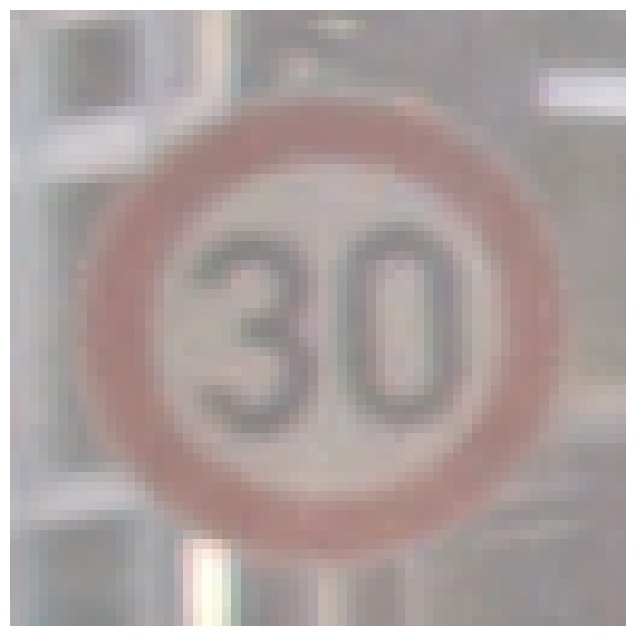

In [215]:
def show_image(img_path):
    img = load_image(img_path)
    plt.imshow(img)
    plt.axis('off')

show_image(glob(f'{train_folders[1]}/*.png')[1])

In [216]:
# class_names = ['priority_road', 'give_way', 'stop', 'no_entry']
# class_indices = [4, 5, 6, 9] # The order of the folders is messed. So manually finding indices
class_names=['0twenty_speed_limit', '1thirty_speed_limit', '10no-overtaking', 
             '11crossroad', '12priority_road', '13yield', '14stop', '15no_vehicle', 
             '16overload_vehicles_prohibited', '17do_not_enter', '18general_danger', 
             '19left_curve', '2fifty_speed_limit', '20right_curve', '21double_curve', 
             '22uneven_road_surface', '23slippery', '24road_narrows', '25road_works', 
             '26traffic_signal_ahead', '27pedestrains', '28watch_for_children', 
             '29bicycle_prohibited', '3sixty_speed_limit', '30ice_snow', '31wild_animal_crossing', 
             '32end_of_restrictions', '33turn_right_ahead', '34turn_left_ahead', 
             '35ahead_only', '36ahead_or_right_turn_only', '37ahead_or_left_turn_only', 
             '38pass_by_on_right', '39pass_by_on_left', '4seventy_speed_limit', '40roundabout', 
             '41end_of_no_passing_zone', '42end_of_no_passing_zone_for_trucks', '5eighty_speed_limit', 
             '6end_of_speed_limit', '7hundred_speed_limit', '8one_twenty_speed_limit', '9no_passing']
# class_indices = ['0', '1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','24','25','26','27','28','29','3','30','31','32','33','34','35','36','37','38','39','4','40','41','42','5','6','7','8','9']
class_indices = [i for i in range(43)]

In [217]:
len(class_names)

43

In [218]:
DATA_DIR = Path('data')
DATASETS = ['train', 'val', 'test']

for ds in DATASETS:
    for cls in class_names:
        (DATA_DIR / ds / cls).mkdir(parents=True, exist_ok=True)

Reserving 80% of the images for training, 10% for validation, and 10% for test for each class

In [219]:
local_pc = False

for i, cls_index in enumerate(class_indices):
    if local_pc:
        image_paths = np.array(glob(f'{train_folders[cls_index]}/*.png'))[:100]
    else:
        image_paths = np.array(glob(f'{train_folders[cls_index]}/*.png'))
    class_name = class_names[i]
    print(f'{class_name}: {len(image_paths)}')
    np.random.shuffle(image_paths)

    ds_split = np.split(
        image_paths,
        indices_or_sections=[int(.8*len(image_paths)),int(.9*len(image_paths))]
    )

    dataset_data = zip(DATASETS, ds_split)

    for ds, images in dataset_data:
        for image_path in images:
            shutil.copy(image_path, f'{DATA_DIR}/{ds}/{class_name}/')

0twenty_speed_limit: 420
1thirty_speed_limit: 4440
10no-overtaking: 4020
11crossroad: 2640
12priority_road: 4200
13yield: 4320
14stop: 1560
15no_vehicle: 1260
16overload_vehicles_prohibited: 840
17do_not_enter: 2220
18general_danger: 2400
19left_curve: 420
2fifty_speed_limit: 4500
20right_curve: 720
21double_curve: 660
22uneven_road_surface: 780
23slippery: 1020
24road_narrows: 540
25road_works: 3000
26traffic_signal_ahead: 1200
27pedestrains: 480
28watch_for_children: 1080
29bicycle_prohibited: 540
3sixty_speed_limit: 2820
30ice_snow: 900
31wild_animal_crossing: 1560
32end_of_restrictions: 480
33turn_right_ahead: 1378
34turn_left_ahead: 840
35ahead_only: 2400
36ahead_or_right_turn_only: 780
37ahead_or_left_turn_only: 420
38pass_by_on_right: 4140
39pass_by_on_left: 600
4seventy_speed_limit: 3960
40roundabout: 720
41end_of_no_passing_zone: 480
42end_of_no_passing_zone_for_trucks: 480
5eighty_speed_limit: 3720
6end_of_speed_limit: 840
7hundred_speed_limit: 2880
8one_twenty_speed_limit: 2

### Applying Image augmentation technique to artificially increase the size of our training dataset

In [220]:
# Mean and Standard deviation for Normalization. The following are the 
# mean and standard deviation of the pixel values in the ImageNet dataset.

# Normalization is done here to speed up the convergence of the 
# training process and to ensure that the model training remains stable.

mean_nums = [0.485,0.456,0.406]
std_nums = [0.229, 0.224, 0.225]

transforms = {'train': T.Compose([
    T.RandomResizedCrop(size=256),
    T.RandomRotation(degrees=15),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean_nums, std_nums)
]), 'val': T.Compose([
    T.Resize(size=256),
    T.CenterCrop(size=224),
    T.ToTensor(),
    T.Normalize(mean_nums, std_nums)
]), 'test': T.Compose([
    T.Resize(size=256),
    T.CenterCrop(size=224),
    T.ToTensor(),
    T.Normalize(mean_nums, std_nums)
])}

In [221]:
# Create a Pytorch dataset for each image dataset folder and data loaders
# for easier trainig.

image_datasets = {
    d: ImageFolder(f'{DATA_DIR}/{d}', transforms[d]) for d in DATASETS
}

data_loaders = {
    d: DataLoader(image_datasets[d], batch_size=4, shuffle=True, num_workers=4) for d in DATASETS
}

In [222]:
dataset_sizes = {d: len(image_datasets[d]) for d in DATASETS}
print(dataset_sizes)
class_names = image_datasets['train'].classes
print(class_names)

{'train': 62734, 'val': 7842, 'test': 7842}
['0twenty_speed_limit', '10no-overtaking', '11crossroad', '12priority_road', '13yield', '14stop', '15no_vehicle', '16overload_vehicles_prohibited', '17do_not_enter', '18general_danger', '19left_curve', '1thirty_speed_limit', '20right_curve', '21double_curve', '22uneven_road_surface', '23slippery', '24road_narrows', '25road_works', '26traffic_signal_ahead', '27pedestrains', '28watch_for_children', '29bicycle_prohibited', '2fifty_speed_limit', '30ice_snow', '31wild_animal_crossing', '32end_of_restrictions', '33turn_right_ahead', '34turn_left_ahead', '35ahead_only', '36ahead_or_right_turn_only', '37ahead_or_left_turn_only', '38pass_by_on_right', '39pass_by_on_left', '3sixty_speed_limit', '40roundabout', '41end_of_no_passing_zone', '42end_of_no_passing_zone_for_trucks', '4seventy_speed_limit', '5eighty_speed_limit', '6end_of_speed_limit', '7hundred_speed_limit', '8one_twenty_speed_limit', '9no_passing']


### Using a pre-trained model

In [223]:
import time
from tqdm import tqdm
from collections import defaultdict

from torch import nn, optim
from torch.optim import lr_scheduler
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [224]:
def create_model(n_classes):
    model = models.resnet34(pretrained=True)
    n_features = model.fc.in_features
    model.fc = nn.Linear(n_features, n_classes)
    return model.to(device)

base_model = create_model(len(class_names))

c:\Users\hp\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hp\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [225]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    progress = tqdm(data_loader, desc="Training", leave=False)
    for inputs, labels in progress:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Update progress bar
        progress.set_postfix(loss=np.mean(losses), accuracy=correct_predictions.double() / n_examples)

    
    scheduler.step()
    return correct_predictions.double() / n_examples, np.mean(losses)


def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    progress = tqdm(data_loader, desc="Evaluating", leave=False)
    with torch.no_grad():
        for inputs, labels in progress:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)
            
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())
            
            # Update progress bar
            progress.set_postfix(loss=np.mean(losses), accuracy=correct_predictions.double() / n_examples)

    return correct_predictions.double() / n_examples, np.mean(losses)



def train_model(model, data_loaders, dataset_sizes, device, n_epochs=3):
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    loss_fn = nn.CrossEntropyLoss().to(device)

    history = defaultdict(list)
    best_accuracy = 0

    # Record the start time of training
    total_start_time = time.time()

    for epoch in range(n_epochs):
        epoch_start_time = time.time()
        print(f'Epoch {epoch + 1}/{n_epochs}')

        train_acc, train_loss = train_epoch(
            model,
            data_loaders['train'],
            loss_fn,
            optimizer,
            device,
            scheduler,
            dataset_sizes['train']
        )
        print(f'Train loss {train_loss} accuracy {train_acc}')

        val_acc, val_loss = eval_model(
            model,
            data_loaders['val'],
            loss_fn,
            device,
            dataset_sizes['val']
        )

        print(f'Val   loss {val_loss} accuracy {val_acc}')
        print('-----------')

        history['train_acc'].append(train_acc)
        history['train_loss'].append(train_loss)
        history['val_acc'].append(val_acc)
        history['val_loss'].append(val_loss)

        if val_acc > best_accuracy:
            torch.save(model.state_dict(), 'best_model_state.bin')
            best_accuracy = val_acc

        # Calculate elapsed time for this epoch
        epoch_duration = time.time() - epoch_start_time
        total_elapsed_time = time.time() - total_start_time

        # Estimate remaining time
        estimated_total_time = total_elapsed_time / (epoch + 1) * n_epochs
        remaining_time = estimated_total_time - total_elapsed_time

        # Convert remaining time to minutes and seconds
        remaining_minutes, remaining_seconds = divmod(remaining_time, 60)
        print(f'Epoch duration: {epoch_duration:.2f} seconds')
        print(f'Estimated remaining time: {int(remaining_minutes)} minutes {int(remaining_seconds)} seconds')

        
    print(f'Best val accuracy: {best_accuracy}')
    model.load_state_dict(torch.load('best_model_state.bin'))
    return model, history

base_model, history = train_model(base_model, data_loaders, dataset_sizes, device)

Epoch 1/3


Training:   0%|          | 0/15684 [00:00<?, ?it/s]

Train loss 0.6823662154070013 accuracy 0.8049861319220837


KeyboardInterrupt: 

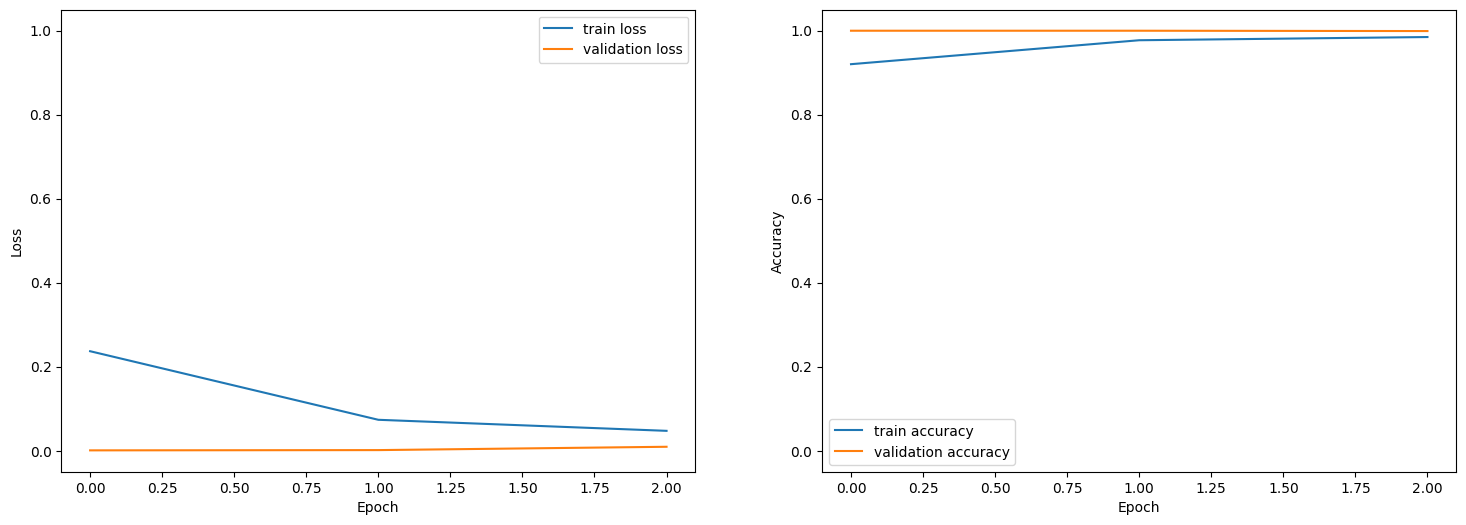

In [161]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Ensure history values are converted to CPU numpy arrays
    train_loss = [loss.cpu().numpy() if torch.is_tensor(loss) else loss for loss in history['train_loss']]
    val_loss = [loss.cpu().numpy() if torch.is_tensor(loss) else loss for loss in history['val_loss']]
    train_acc = [acc.cpu().numpy() if torch.is_tensor(acc) else acc for acc in history['train_acc']]
    val_acc = [acc.cpu().numpy() if torch.is_tensor(acc) else acc for acc in history['val_acc']]


    ax1.plot(train_loss, label='train loss')
    ax1.plot(val_loss, label='validation loss')
    ax1.set_ylim([-0.05, 1.05])
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend()

    ax2.plot(train_acc, label='train accuracy')
    ax2.plot(val_acc, label='validation accuracy')
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    plt.show()

plot_training_history(history)

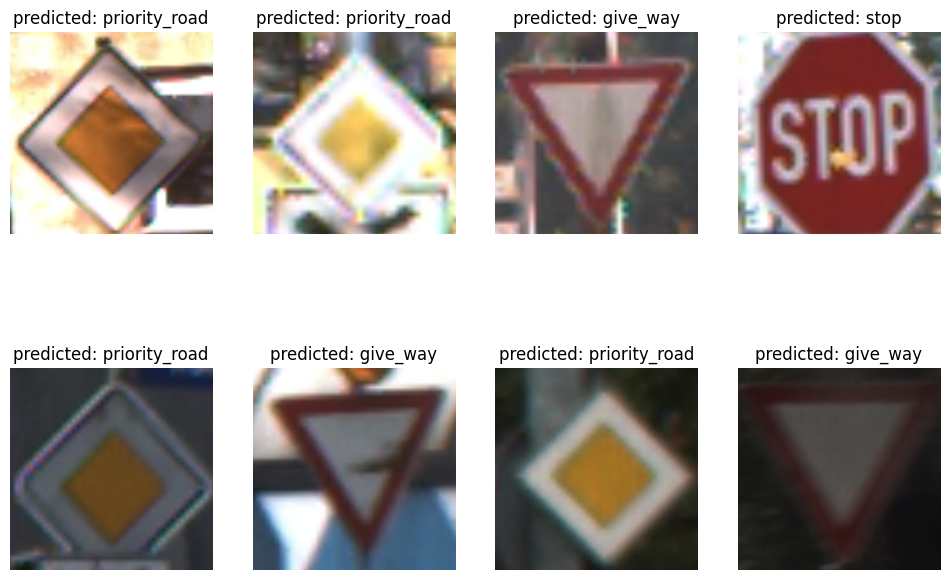

In [167]:
def show_predictions(model, class_names, n_images=6):
  model = model.eval()
  images_handeled = 0
  plt.figure()

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(data_loaders['test']):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      for j in range(inputs.shape[0]):
        images_handeled += 1
        ax = plt.subplot(2, n_images//2, images_handeled)
        ax.set_title(f'predicted: {class_names[preds[j]]}')
        imshow(inputs.cpu().data[j])
        ax.axis('off')

        if images_handeled == n_images:
          return

show_predictions(base_model, class_names, n_images=8)

In [169]:
from sklearn.metrics import classification_report

In [170]:
def get_predictions(model, data_loader):
  model = model.eval()
  predictions = []
  real_values = []
  with torch.no_grad():
    for inputs, labels in data_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      predictions.extend(preds)
      real_values.extend(labels)
  predictions = torch.as_tensor(predictions).cpu()
  real_values = torch.as_tensor(real_values).cpu()
  return predictions, real_values


y_pred, y_test = get_predictions(base_model, data_loaders['test'])
print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

     give_way       1.00      1.00      1.00       432
     no_entry       1.00      1.00      1.00       222
priority_road       1.00      1.00      1.00       420
         stop       1.00      1.00      1.00       156

     accuracy                           1.00      1230
    macro avg       1.00      1.00      1.00      1230
 weighted avg       1.00      1.00      1.00      1230



In [175]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

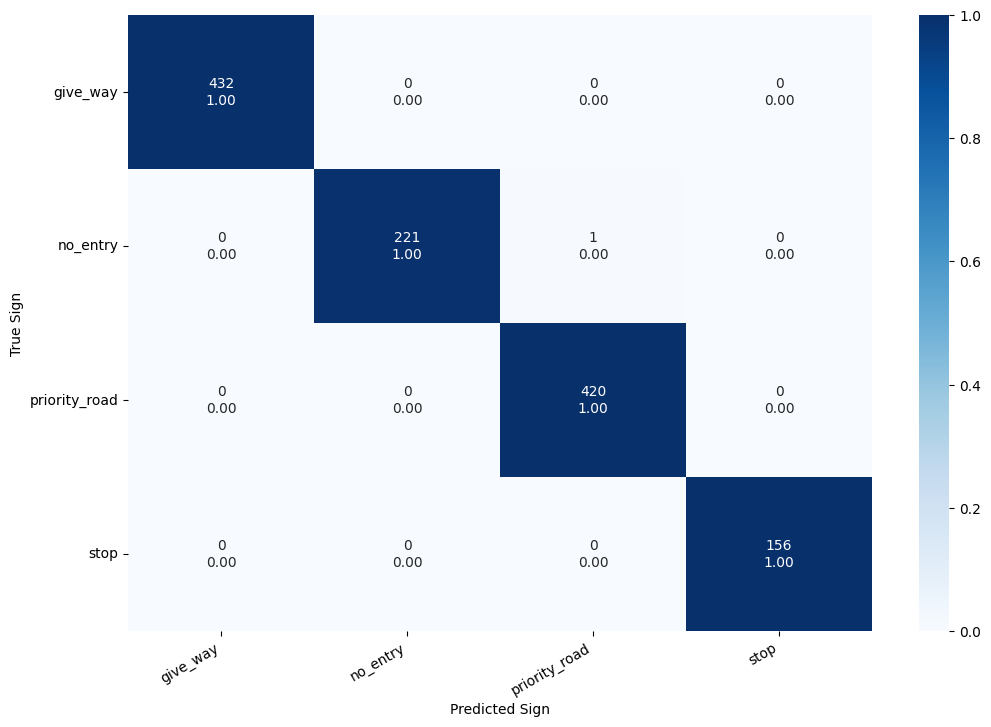

In [176]:
def show_confusion_matrix(confusion_matrix, class_names):

  cm = confusion_matrix.copy()

  cell_counts = cm.flatten()

  cm_row_norm = cm / cm.sum(axis=1)[:, np.newaxis]

  row_percentages = ["{0:.2f}".format(value) for value in cm_row_norm.flatten()]

  cell_labels = [f"{cnt}\n{per}" for cnt, per in zip(cell_counts, row_percentages)]
  cell_labels = np.asarray(cell_labels).reshape(cm.shape[0], cm.shape[1])

  df_cm = pd.DataFrame(cm_row_norm, index=class_names, columns=class_names)

  hmap = sns.heatmap(df_cm, annot=cell_labels, fmt="", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Sign')
  plt.xlabel('Predicted Sign');

cm = confusion_matrix(y_test, y_pred)
show_confusion_matrix(cm, class_names)

In [179]:
import torch.nn.functional as F
import PIL.Image as Image

In [188]:
def predict_proba(model, image_path):
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = transforms['test'](image).unsqueeze(0)

    pred = model(image.to(device))
    pred = F.softmax(pred, dim=1)
    return pred.detach().cpu().numpy().flatten()

pred = predict_proba(base_model, 'priority-road.jpeg')
pred

array([1.9331995e-02, 4.3730540e-03, 9.7627681e-01, 1.8164668e-05],
      dtype=float32)

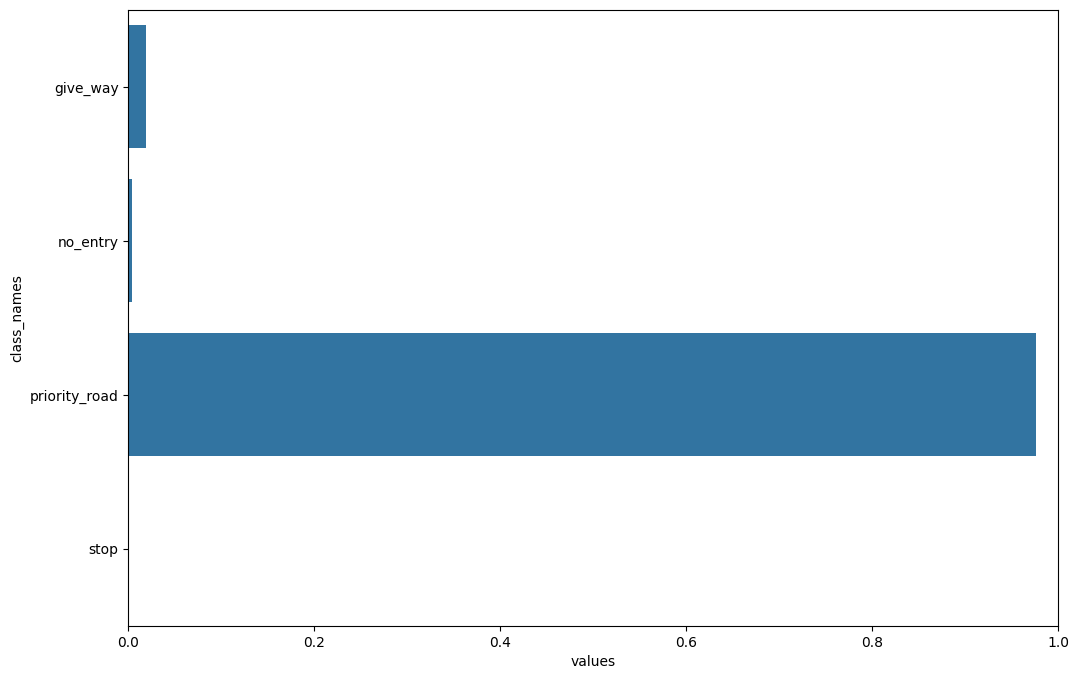

In [189]:
def show_prediction_confidence(prediction, class_names):
    pred_df = pd.DataFrame({
        'class_names': class_names,
        'values': prediction
    })
    sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
    plt.xlim([0, 1])

show_prediction_confidence(pred, class_names)